In [1]:
import wfdb
from scipy import signal
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd
import csv
from hrvanalysis import get_time_domain_features
import seaborn as sns

In [2]:
# Loading The Real Data (PTBDB)
with open('D:/paper_data/datasets/ptb-diagnostic-ecg-database-1.0.0/RECORDS') as fp:  
    lines = fp.readlines()

files_unhealthy, files_healthy, files_Heartfailure= [], [], []

for file in lines:
    file_path = "D:/paper_data/datasets/ptb-diagnostic-ecg-database-1.0.0/" + file[:-1] + ".hea"
    
    # Reading The Header To Determine The Class
    if 'Myocardial infarction' in open(file_path).read():
        files_unhealthy.append(file)
        
    if 'Healthy control' in open(file_path).read():
        files_healthy.append(file)

In [3]:
def load_data(file,channel):
    data, _ = wfdb.rdsamp("D:/paper_data/datasets/ptb-diagnostic-ecg-database-1.0.0/" + file[:-1], channel_names=[str(channel)])   
    data = data[:20000]   
    return data.flatten()

In [4]:
## 变量定义
seed_num = 49
#torch.manual_seed(seed_num)
run_num = 7
channel_1 = 'v1'
channel_3 = 'v3'
channel_4 = 'v4'
channel_5 = 'v5'
channel_6 = 'v6'
channels = [channel_1,channel_3, channel_4, channel_5, channel_6]
lowcut = 100
highcut = 499
fs = 1000
order = 5
sampling_rate=1000

In [5]:
healthy = []
for file in files_healthy:
    data_healthy = []
    for channel in channels:      
        data = load_data(file,channel)
        data_healthy.append(data)
    healthy.append(data_healthy)
        
unhealthy = []
for file in files_unhealthy:
    data_unhealthy = []
    for channel in channels:      
        data = load_data(file,channel)
        data_unhealthy.append(data)
    unhealthy.append(data_unhealthy)

In [6]:
healthy_np = np.array(healthy)
unhealthy_np = np.array(unhealthy)

In [200]:
X = np.concatenate((healthy_np, unhealthy_np), axis=0)

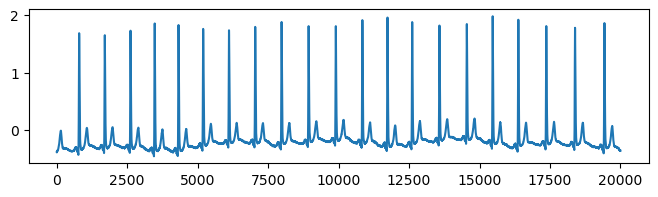

In [206]:
plt.figure(figsize=(8, 2))
plt.plot(X[0][3])

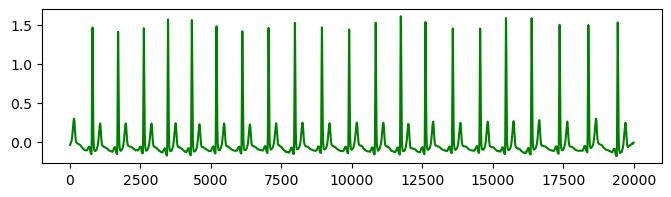

In [218]:
plt.figure(figsize=(8, 2))
cleaned_X03 = nk.ecg_clean(X[0][3], sampling_rate=1000, method="neurokit")
plt.plot(cleaned_X03,color = 'g')

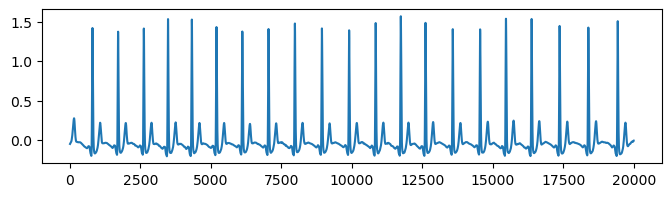

In [214]:
plt.figure(figsize=(8, 2))
LF03 = butter_bandpass_filter(cleaned_X03, 1000,1, 150)
plt.plot(LF03)

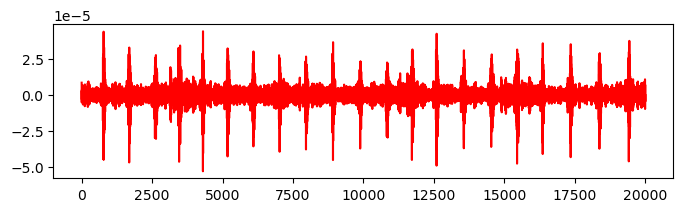

In [216]:
plt.figure(figsize=(8, 2))
LF03 = butter_bandpass_filter(cleaned_X03, 1000,150, 250)
plt.plot(LF03, color = "r")

In [195]:
def get_qrs(data, sampling_rate):
    qrs = []
    cleaned_qrs = nk.ecg_clean(data, sampling_rate=1000, method="neurokit")
    epochs = nk.ecg_segment(data , rpeaks=None, sampling_rate=sampling_rate, show=False)
    for i in range(1, len(epochs) + 1):
        qrs.append(epochs[str(i)].Signal)
    return qrs

In [196]:
qrs_test1 = get_qrs(X[2][3], 1000)

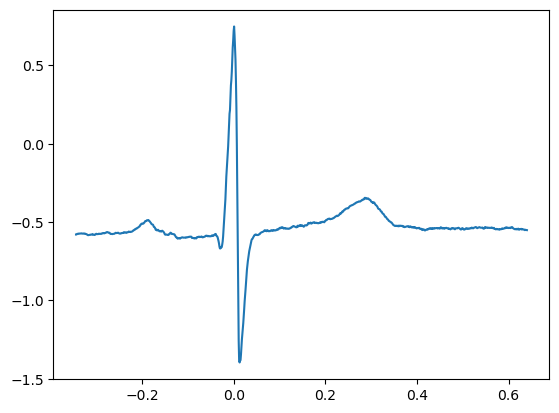

In [224]:
plt.plot(qrs_test1[0])

In [258]:
cleaned_x23 = nk.ecg_clean(X[5][3][:5000], sampling_rate=1000, method="neurokit")

_, neurokit = nk.ecg_peaks(cleaned_x23, sampling_rate=1000, method="neurokit")
r_peaks = neurokit["ECG_R_Peaks"]
q_peaks = neurokit["ECG_Q_Peaks"]
s_peaks = neurokit["ECG_S_Peaks"]

KeyError: 'ECG_Q_Peaks'

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([ 460, 1164, 1863, 2570, 3283, 3985, 4690]),
 'sampling_rate': 1000}

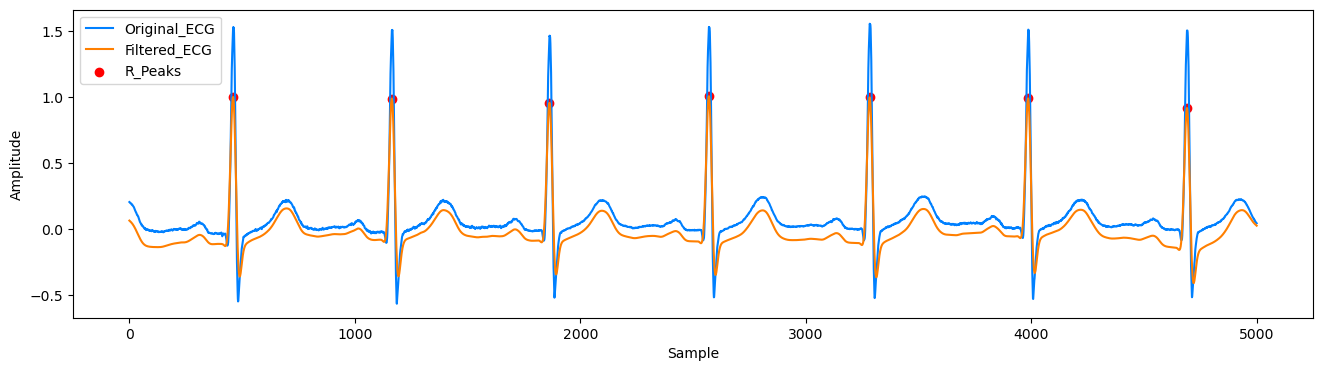

In [260]:
plt.figure(figsize=(16, 4))
# 绘制 ECG 信号
plt.plot(X[5][3][:5000], color="#0080ff", label='Original_ECG')
plt.plot(cleaned_x23, color='#ff7f00', label='Filtered_ECG')

# 标注 R 峰位置
plt.scatter(r_peaks, cleaned_x23[r_peaks], color='red', label='R_Peaks')
# # 标注 R 峰位置
# plt.scatter(r_peaks, cleaned_x23[q_peaks], color='y', label='Q_Peaks')
# # 标注 R 峰位置
# plt.scatter(r_peaks, cleaned_x23[s_peaks], color='g', label='S_Peaks')

# 添加标题和标签

plt.xlabel('Sample')
plt.ylabel('Amplitude')

# 显示图形
plt.legend()
plt.show()

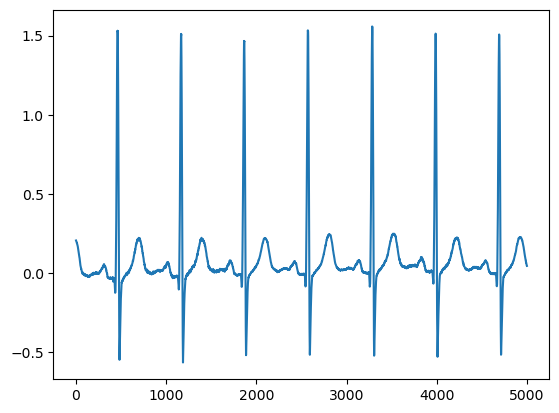

In [236]:
plt.plot( X[5][3][:5000])

In [198]:
def butter_bandpass_filter(signal, fs, lowcut, highcut, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

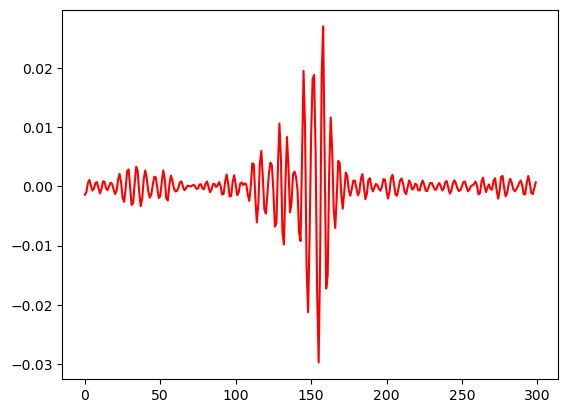

In [205]:
HFQRS1 = butter_bandpass_filter(qrs_test1[5], 1000,150, 250)
plt.plot(HFQRS1[200:500],color = "r")

In [4]:
## 变量定义
seed_num = 49
#torch.manual_seed(seed_num)
run_num = 7
channel_1 = 'v1'
channel_3 = 'v3'
channel_4 = 'v4'
channel_5 = 'v5'
channel_6 = 'v6'
channels = [channel_1,channel_3, channel_4, channel_5, channel_6]
lowcut = 100
highcut = 499
fs = 1000
order = 5
sampling_rate=1000

In [5]:
healthy = []
for file in files_healthy:
    data_healthy = []
    for channel in channels:      
        data = load_data(file,channel)
        data_healthy.append(data)
    healthy.append(data_healthy)
        
unhealthy = []
for file in files_unhealthy:
    data_unhealthy = []
    for channel in channels:      
        data = load_data(file,channel)
        data_unhealthy.append(data)
    unhealthy.append(data_unhealthy)

In [12]:
healthy_np = np.array(healthy)
unhealthy_np = np.array(unhealthy)

In [410]:
##基线漂移
def butter0(data):
    b, a = signal.butter(8, 0.01, 'highpass')
    data_f0 = signal.filtfilt(b, a, data)
    return data_f0
for i, data in enumerate(healthy_np):
    for j, ecg in enumerate(data):
        healthy_np[i][j] = butter0(ecg)

for i, data in enumerate(unhealthy_np):
    for j, ecg in enumerate(data):
        unhealthy_np[i][j] = butter0(ecg)
    

In [411]:
X = np.concatenate((healthy_np, unhealthy_np), axis=0)
import biosppy.signals.ecg as ecg
rpeaks = []
for index in range(len(X)):
    rpeaklist = []
    if index%100 == 0:
        print("index: ",index)
    for channel in range(5):
        cleaned = nk.ecg_clean(X[index][channel], sampling_rate=1000, method="neurokit")
        _, neurokit = nk.ecg_peaks(cleaned, sampling_rate=1000, method="neurokit")
        rpeak = neurokit["ECG_R_Peaks"]
        rpeaklist.append(rpeak)
    rpeaks.append(rpeaklist)

index:  0
index:  100
index:  200
index:  300
index:  400


In [672]:
# def get_qrs(data, sampling_rate, method):
#     signals, info = nk.ecg_process(data, sampling_rate, method)
#     rpeak_on = info['ECG_R_Onsets']
#     rpeak_off = info['ECG_T_Onsets']
#     rpeak = info['ECG_R_Peaks']
#     qrs_list = []
#     for i in range(len(rpeak)):     
#         if not np.isnan(rpeak_on[i]) and not np.isnan(rpeak_off[i]):
#             qrs = data[rpeak_on[i]:rpeak_off[i]]
#             qrs_list.append(qrs)
#     return qrs_list
def get_qrs(data, sampling_rate):
    qrs = []
    cleaned_qrs = nk.ecg_clean(data, sampling_rate=1000, method="neurokit")
    epochs = nk.ecg_segment(cleaned_qrs , rpeaks=None, sampling_rate=sampling_rate, show=False)
    for i in range(1, len(epochs) + 1):
        qrs.append(epochs[str(i)].Signal)
    return qrs

In [673]:
qrs_indexs = []
for ecg in X:
    qrs_index_list = []
    for channel in ecg:
        qrs = get_qrs(channel, 1000)
        qrs_index_list.append(qrs)
    qrs_indexs.append(qrs_index_list)


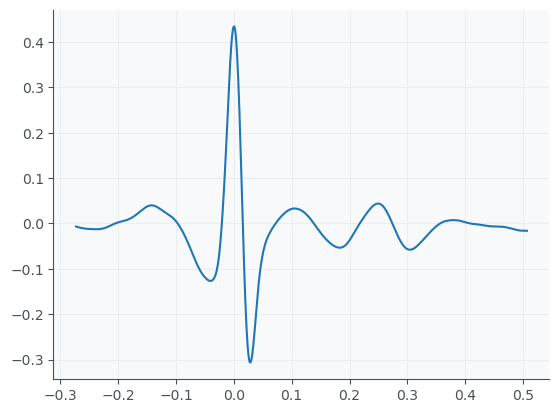

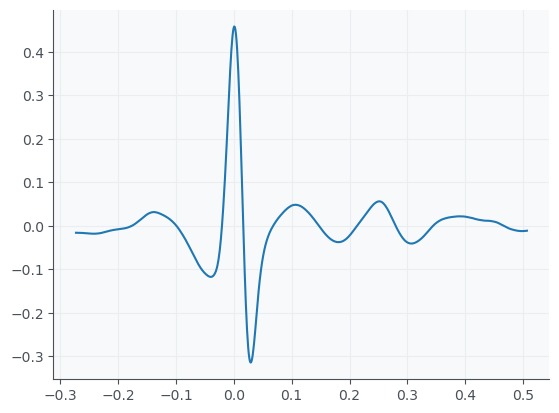

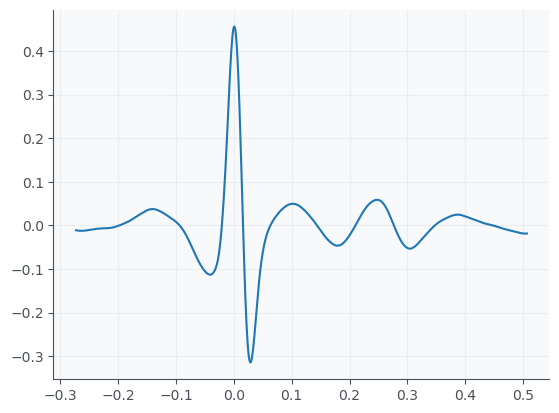

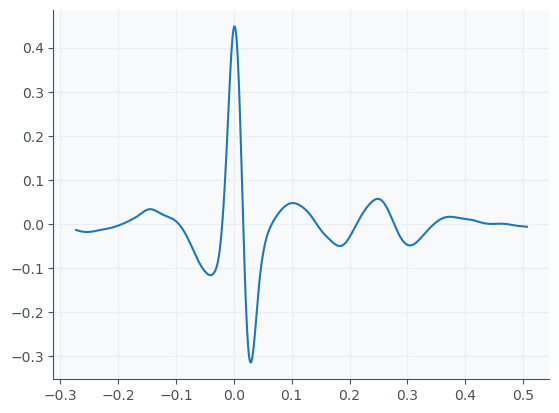

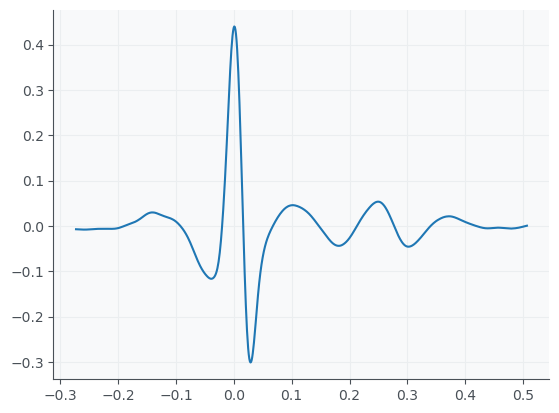

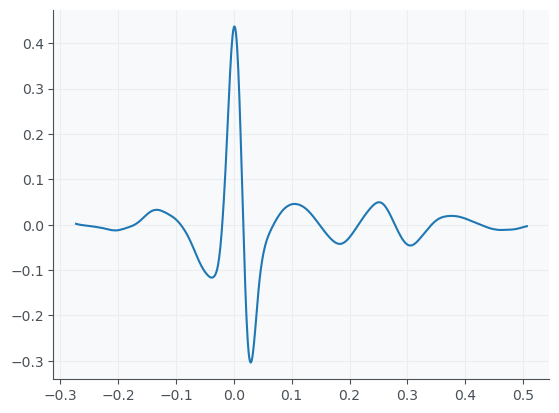

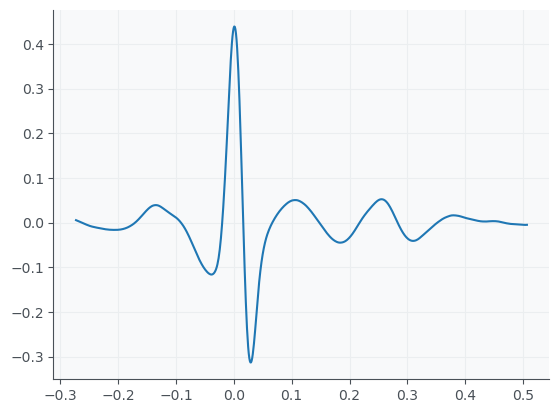

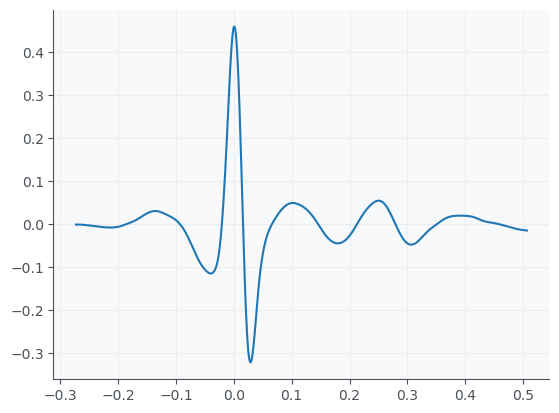

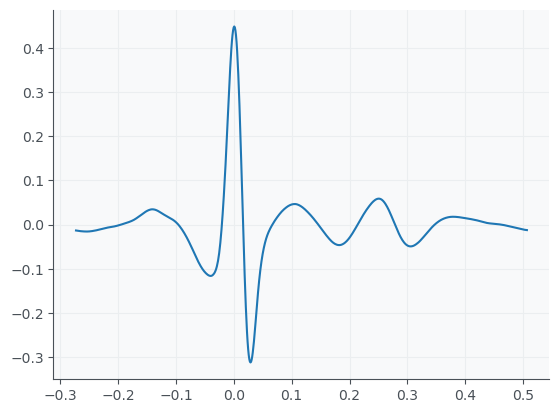

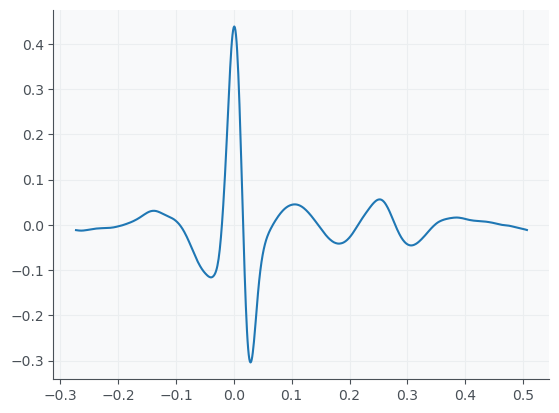

In [681]:
for qrs in qrs_indexs[1][3][:10]:
    plt.plot(qrs)
    plt.show()

In [645]:
from scipy.signal import butter, filtfilt,find_peaks,hilbert
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
import pywt



def butter_bandpass(lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    w = pywt.wavedec(y, 'sym4',level=3)  # 小波分解，pywt.wavedec(数据, 小波基,分解尺度),分解得到的w是一个列表，w[0]是最大尺度的近似系数，w[1]是最大尺度的细节系数，w[2]是次大尺度的细节系数，以此类推

    thr = (np.median(np.abs(w[0])) / 0.6745) * (np.sqrt(2 * np.log(len(y))))  # 阈值获取，方式为VisuShrink通用阈值


    for i in range(1, len(w)):
        w[i] = pywt.threshold(w[i], thr, mode='soft')  # 阈值处理函数

    rec_s = pywt.waverec(w, 'sym4')  # 小波重构
    analytic_signal = hilbert(rec_s)
    amplitude_envelope = np.abs(analytic_signal)

    
    return rec_s, amplitude_envelope

In [436]:
lowcut = 100
fs = 1000
order = 8
HF_AX = []
for index in range(len(qrs_list)):  
    if index%100 == 0:
        print("index: ",index)
    HF_ax = []
    for channel in range(len(channels)):
        HF_ax_c = []    
        for i in range(len(qrs_list[index][channel])):
#             hfqrs = ex_amplitude_envelope(qrs_list_ch[index][channel][i], lowcut=100, fs=1000 ,order=8)
            hfqrs, hfqrs_A = butter_bandpass_filter(qrs_list[index][channel][i], 150,499,1000)
            HF_ax_c.append(hfqrs)
        HF_ax.append(HF_ax_c)
    HF_AX.append(HF_ax)

index:  0
index:  100
index:  200
index:  300
index:  400


In [490]:
import pickle

# 假设 HF_AX 是你的列表
# 保存 HF_AX 到文件
with open('HF_AX.pkl', 'wb') as file:
    pickle.dump(HF_AX, file)

# # 加载保存的 HF_AX 列表
# with open('HF_AX.pkl', 'rb') as file:
#     loaded_HF_AX = pickle.load(file)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (448, 5, 10) + inhomogeneous part.

In [442]:
from mne.time_frequency import psd_array_multitaper
from hrvanalysis import get_time_domain_features
from scipy.stats import kurtosis
from scipy.signal import argrelextrema

D:\software\anaconda\Lib\site-packages\mne\fixes.py:988: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
D:\software\anaconda\Lib\site-packages\mne\fixes.py:988: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
D:\software\anaconda\Lib\site-packages\mne\externals\tempita\__init__.py:35: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi


## Amax

## RMS0.1Am

## 峰度

## PMI and hfmi

In [444]:
Amax_value_list_np = np.array(Amax_value_list)
rmses_list_np = np.array(rmses_list)
kurtosises_list_np = np.array(kurtosises_list)
pmis_list_np = np.array(pmis_list)
hfmis_list_np = np.array(hfmis_list)

In [445]:
tf_features_np = np.concatenate((Amax_value_list_np, rmses_list_np, kurtosises_list_np, pmis_list_np, hfmis_list_np), axis=2)

In [446]:
tf_features_np.shape

(448, 5, 50)

In [447]:
f1_features_np = np.sum(tf_features_np, axis=1)

In [448]:
np.save('f_features_new1.npy',f1_features_np)

In [449]:
f1_features_np.shape

(448, 50)

In [450]:
f_features_np = tf_features_np.reshape(len(tf_features_np), -1)

In [451]:
f_features_np.shape

(448, 250)

In [452]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=10)
pca_model.fit(f_features_np)
f_features_np_pca = pca_model.fit_transform(f1_features_np)
pca_model.explained_variance_ratio_.sum()

0.9998294994853425

In [493]:
 data_s0010, _ = wfdb.rdsamp("D:/paper_data/datasets/ptb-diagnostic-ecg-database-1.0.0/patient002/s0010_re", channel_names=["v3"])   

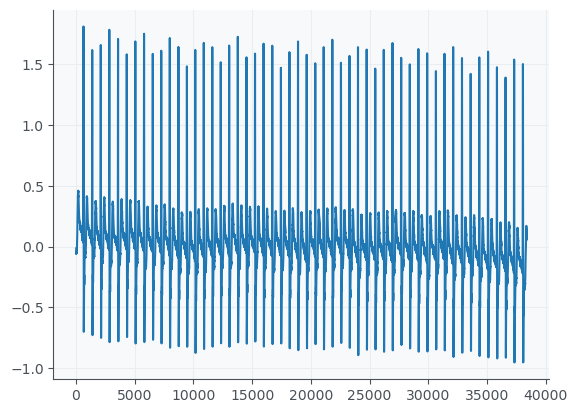

In [494]:
 plt.plot(data_s0010)

In [253]:
qrs_s0010 = get_qrs(X[1][2][0:10000], 1000)
cleaned = nk.ecg_clean(qrs_s0010[0], sampling_rate=1000, method="neurokit")

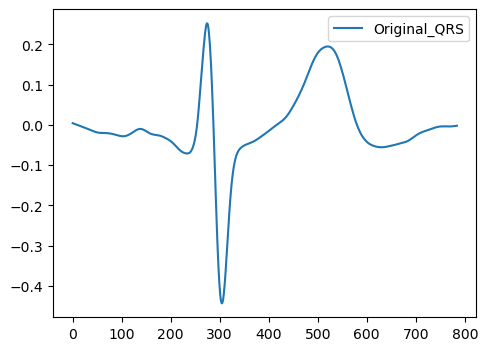

In [254]:
# hfqrs, hfqrs_A = butter_bandpass_filter(qrs_s0010[5], 100,499,1000, 7)
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(np.arange(785), cleaned, label='Original_QRS')
plt.legend()

# plt.subplot(1,2,2)
# plt.plot(hfqrs, color='red', label='HFQRS')
# plt.legend()
# plt.show()


In [219]:
plt.figure(figsize=(12, 4))
plt.plot(data_s0010[:5000], label='Original_ECG')
plt.legend()

signals, info = nk.ecg_process(data_s0010[:5000].flatten(), 1000)
cleaned_ecg = signals["ECG_Clean"]

plt.plot(cleaned_ecg, color='red', label='Cleaned_ECG')
plt.legend()
plt.show()

NameError: name 'data_s0010' is not defined

<Figure size 1200x400 with 0 Axes>

In [222]:
hfqrs, hfqrs_A = butter_bandpass_filter(qrs_s0010[5], 100,499,1000, 7)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

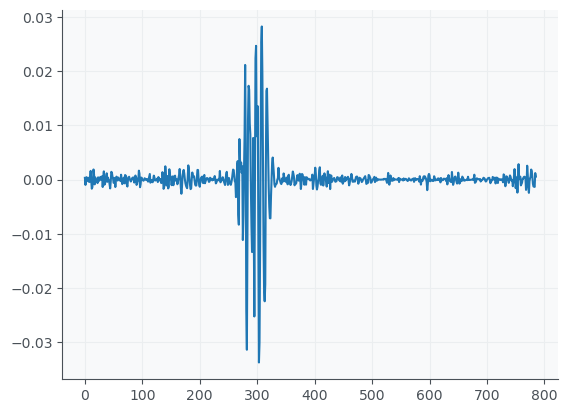

In [722]:
plt.plot(hfqrs)

In [506]:
signals_s0010, info = nk.ecg_process(data_s0010[:10000].flatten(), sampling_rate)
cleaned_ecg_s0010 = signals_s0010["ECG_Clean"]

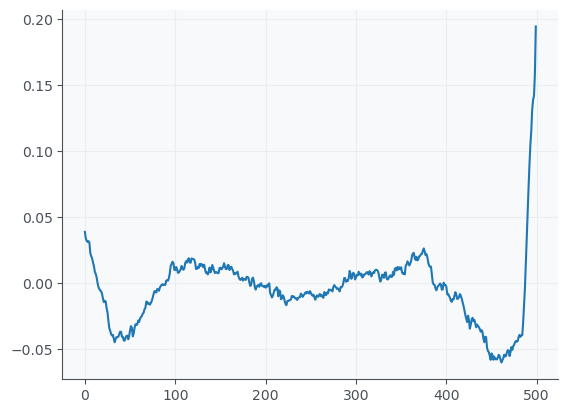

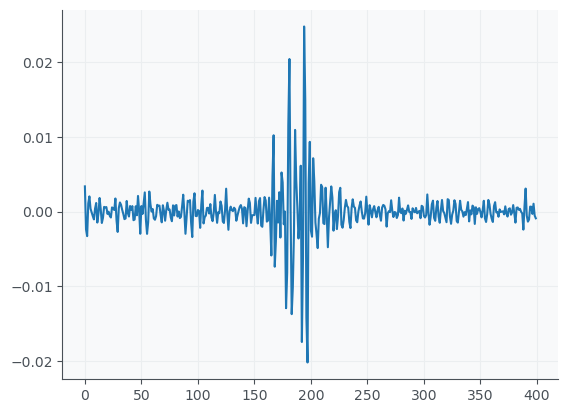

In [538]:
plt.plot(X[1][2][1000:1500])
plt.show()
plt.plot(HF_AX[1][2][4][100:500])
plt.show()

In [634]:
cleaned = nk.ecg_clean(X[1][3], sampling_rate=1000, method="neurokit")

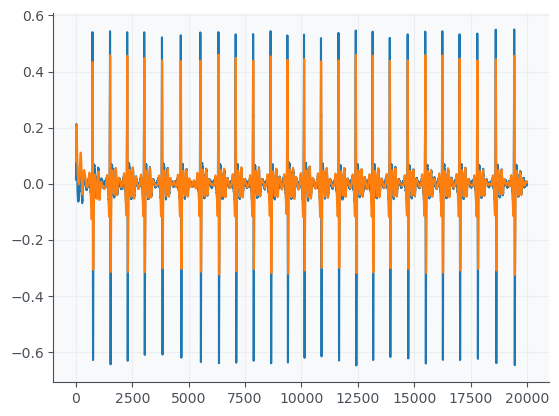

In [640]:
plt.plot(X[1][2])
plt.plot(cleaned )

In [641]:
qrs_clean = get_qrs(cleaned, 1000)

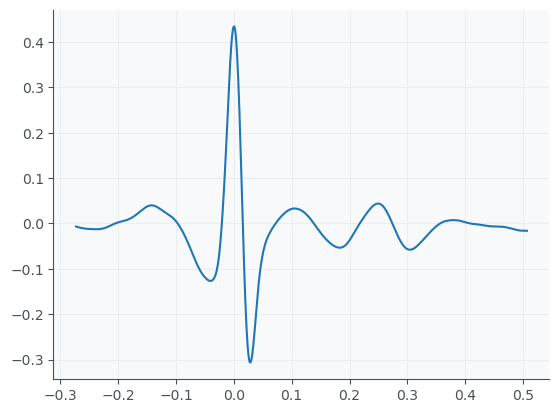

In [642]:
plt.plot(qrs_clean[0])

In [708]:
hfqrs_clean, hfqrs_A_clean = ex_amplitude_envelope(qrs_clean[1], 100, 490, 1000, 6)

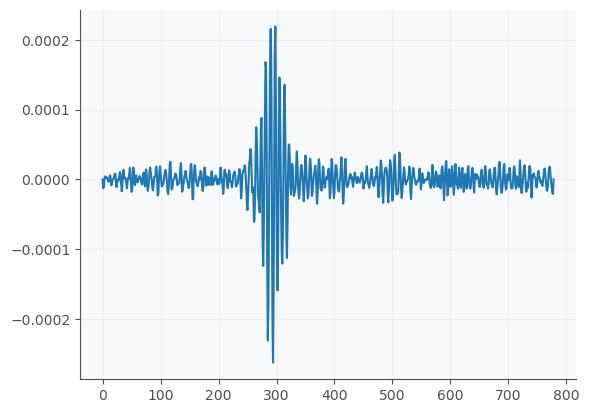

In [711]:
plt.plot(hfqrs_clean)

In [647]:
def ex_amplitude_envelope(signal, lowcut,highcut, fs, order):
    """
    希尔伯特变换获取包络信息
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], 'band')
    y = filtfilt(b, a, signal)
#     plt.plot(y)
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)
    return analytic_signal, amplitude_envelope